In [31]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os

In [32]:
cmpd_plate=["n1","n2","n3"]

In [33]:

cmpd_dose_plate_n3=[]
for n_exp in range(len(cmpd_plate)):
    cmpd_dose_plate=[]
    for plate in range(len(cmpd_plate)):
        folder = "F://github//for single molecule analysis//data//for dose dependent assay//"+cmpd_plate[n_exp] ##select your folder  ex)C://folder//cmpd_plate[n_exp]
        files=glob.glob(folder+"\\*.csv")

        msds=[]

        for file in files:
            with open(file,'r') as f:
                msd=[]
                reader=csv.reader(f)
                header = next(reader)
                for row in reader:
                    msd.append([int(row[0]),float(row[2]),int(row[3])])
                sp=os.path.basename(file).split("_")
                well=sp[1]
                msds.append([int(ord(well[0])-ord('B')),int(well[1:])-2,1 if sp[3][0]=="p" else 0,msd])


        msd_average=np.zeros((10,6,2,len(msds[0][3])))
        msd_count=np.zeros((10,6,2))




        plate_data=[]
        for i in range(10):
            for j in range(6):
                well_bef=[]
                well_aft=[]
                for msd in msds:
                    if j==msd[0] and i==msd[1]:
                        result_bef=[]
                        result_aft=[]

                        if msd[2]==0:    #msd[2]は薬剤添加前後の判断
                            for n in range(len(msd[3])):
                                result_bef.append(msd[3][n][1])

                        elif msd[2]==1:
                            for n in range(len(msd[3])):
                                result_aft.append(msd[3][n][1])

                        well_bef.append(result_bef)
                        well_aft.append(result_aft)
                well=[well_bef,well_aft]
                plate_data.append(well)


        cmpd_dose_plate.append(plate_data)
    cmpd_dose_plate_n3.append(cmpd_dose_plate)

In [34]:
flame=5

In [35]:
condition=0 #EGF添加前

cmpd_dose_info_cell_bef=[]

for plate in range(len(cmpd_plate)):
    
    cmpd_dose_bef=[]
    for well in range(len(cmpd_dose_plate_n3[enu][plate])):
        cmpd_bef=[]
        for enu in range(0,3):
            for cell in range(len(cmpd_dose_plate_n3[enu][plate][well][condition])):
                if cmpd_dose_plate_n3[enu][plate][well][condition][cell]==[]:
                    continue
                cmpd_bef.append(cmpd_dose_plate_n3[enu][plate][well][condition][cell][flame])
        cmpd_dose_bef.append(cmpd_bef)

    factor_arraybef=np.array(cmpd_dose_bef).reshape(10,6).T
    cmpd_infobef=factor_arraybef.flatten().reshape(12,5)
    
    cmpd_dose_info_cell_bef.extend(cmpd_infobef)

<ipython-input-35-7a83b50d2c36>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  factor_arraybef=np.array(cmpd_dose_bef).reshape(10,6).T


In [36]:
condition=1 #EGF添加後

cmpd_dose_info_cell_aft=[]

for plate in range(len(cmpd_plate)):
    
    cmpd_dose_aft=[]
    for well in range(len(cmpd_dose_plate_n3[enu][plate])):
        cmpd_aft=[]
        for enu in range(0,3):
            for cell in range(len(cmpd_dose_plate_n3[enu][plate][well][condition])):
                if cmpd_dose_plate_n3[enu][plate][well][condition][cell]==[]:
                    continue
                cmpd_aft.append(cmpd_dose_plate_n3[enu][plate][well][condition][cell][flame])
        cmpd_dose_aft.append(cmpd_aft)
    factor_arrayaft=np.array(cmpd_dose_aft).reshape(10,6).T
    cmpd_infoaft=factor_arrayaft.flatten().reshape(12,5)
    
    cmpd_dose_info_cell_aft.extend(cmpd_infoaft)

<ipython-input-36-74ab23dee03b>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  factor_arrayaft=np.array(cmpd_dose_aft).reshape(10,6).T


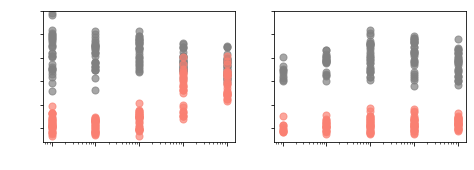

In [37]:
plt.figure(figsize=(20,40))

for num in range(0,2):
    plt.subplot(14, 5, num+1)
    plt.xscale("log")
    plt.ylim(0.01,0.15)
    plt.xticks(color="None")
    plt.yticks(color="None")
    
    
    #添加前のグラフ
    plt.scatter([10]*len(cmpd_dose_info_cell_bef[num][0]),cmpd_dose_info_cell_bef[num][0],s=50,marker="o",color="grey",alpha=0.7)
    plt.scatter([1]*len(cmpd_dose_info_cell_bef[num][1]),cmpd_dose_info_cell_bef[num][1],s=50,marker="o",color="grey",alpha=0.7)
    plt.scatter([0.1]*len(cmpd_dose_info_cell_bef[num][2]),cmpd_dose_info_cell_bef[num][2],s=50,marker="o",color="grey",alpha=0.7)
    plt.scatter([0.01]*len(cmpd_dose_info_cell_bef[num][3]),cmpd_dose_info_cell_bef[num][3],s=50,marker="o",color="grey",alpha=0.7)
    plt.scatter([0.001]*len(cmpd_dose_info_cell_bef[num][4]),cmpd_dose_info_cell_bef[num][4],s=50,marker="o",color="grey",alpha=0.7)

    #添加後のグラフ
    plt.scatter([10]*len(cmpd_dose_info_cell_aft[num][0]),cmpd_dose_info_cell_aft[num][0],s=50,marker="o",color="salmon",alpha=0.7)
    plt.scatter([1]*len(cmpd_dose_info_cell_aft[num][1]),cmpd_dose_info_cell_aft[num][1],s=50,marker="o",color="salmon",alpha=0.7)
    plt.scatter([0.1]*len(cmpd_dose_info_cell_aft[num][2]),cmpd_dose_info_cell_aft[num][2],s=50,marker="o",color="salmon",alpha=0.7)
    plt.scatter([0.01]*len(cmpd_dose_info_cell_aft[num][3]),cmpd_dose_info_cell_aft[num][3],s=50,marker="o",color="salmon",alpha=0.7)
    plt.scatter([0.001]*len(cmpd_dose_info_cell_aft[num][4]),cmpd_dose_info_cell_aft[num][4],s=50,marker="o",color="salmon",alpha=0.7)